__Workshop for Social Science Research Masters__


__Prepared by Diliara Valeeva, CORPNET, AISSR__

_25th April 2019_

_UvA, Roeterseiland campus, room REC JK B.54_

email: d.valeeva@uva.nl

http://diliaravaleeva.com

http://corpnet.uva.nl

https://twitter.com/diliara_valeeva

# Scraping Twitter

See https://slides.com/diliaravaleeva/masm2019 for steps to create a Twitter application

In [ ]:
# Setting the working directory
# example:
setwd('/home/diliara/Dropbox/MASM')

In [1]:
# Attaching packages
library(rtweet)
library(ggplot2)
library(dplyr)
library(tidytext)
library(syuzhet)

## also install httpuv
if (!requireNamespace("httpuv", quietly = TRUE)) {
  install.packages("httpuv")
}


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘syuzhet’

The following object is masked from ‘package:rtweet’:

    get_tokens



## Connecting the app

In [18]:
# From your Twitter app dashboard, insert the name and keys of your app
appname <- "MASM_TEST"

## API key 
key <- "insert-here-api-key-numbers"

## API secret
secret <- "insert-here-api-secret-key-numbers"

In [3]:
twitter_token <- create_token(
  app = appname,
  consumer_key = key,
  consumer_secret = secret)

Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://api.twitter.com/oauth/authenticate?oauth_token=B631HgAAAAAA-HE-AAABakwLGmc&permission=read
Authentication complete.


Follow the link and authorize the app.

If it was sucessful, you will get the following message in your browser:

"Authentication complete. Please close this page and return to R."

## 1. Search for hashtags

In [44]:
## Search for 10,000 tweets using the #ZizekVSPeterson hashtag
zizek <- search_tweets(q = "#ZizekVSPeterson", n = 10000)

Searching for tweets...
Finished collecting tweets!


Twitter limit is 18,000 search results every 15 minutes.

If you want more, set retryonratelimit = TRUE.

E.g. search for 250,000 tweets containing the hashtag:

more_zizek <- search_tweets(q = "#ZizekVSPeterson", n = 250000, retryonratelimit = TRUE).

It will take lots of time, don't run it now.

In [4]:
# Read this dataset:
# zizek <- read.csv('zizek.csv', header = TRUE)

In [45]:
# View first few rows of the dataframe
head(zizek)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
1041711605044600832,1120059559643684864,2019-04-21 20:19:43,NGrosuplje,"Debata #ZizekVSPeterson :”Ni vazno, kdo zmaga, ampak da se lahko pogovarjava!” 👏👏👍👍 vec v blogu ⁦@ZigaTurk⁩ 👇👇 https://t.co/LTBidttmnb",Twitter Web Client,140,NA,NA,NA,⋯,353,697,2018-09-17 15:32:55,FALSE,NA,NA,en,https://pbs.twimg.com/profile_banners/1041711605044600832/1537293446,NA,http://pbs.twimg.com/profile_images/1042110104655601664/iU1xbjRp_normal.jpg
991248393036066816,1120056026085175304,2019-04-21 20:05:40,J_Scamell,#zizek pressing #peterson on “postmodern neo-marxism” extended clip: https://t.co/Xp0JxCw9xl #ZizekVSPeterson #PetersonvsZizek https://t.co/UDriLHTytM,Twitter for iPhone,140,NA,NA,NA,⋯,38,106,2018-05-01 09:30:08,FALSE,NA,NA,en,NA,NA,http://pbs.twimg.com/profile_images/991250166924660737/mVM-BHkF_normal.jpg
2475512675,1120050409975029761,2019-04-21 19:43:21,StefanieNrnberg,〝The true utopia is that we can survive without a change.〞#ZizekVSPeterson https://t.co/ChZ0F5oQc7,Twitter Web Client,98,NA,NA,NA,⋯,1921,806,2014-04-11 05:39:46,FALSE,NA,NA,de,https://pbs.twimg.com/profile_banners/2475512675/1553203318,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1108839947098820630/jBXz-R13_normal.jpg
2931202552,1120048295987044352,2019-04-21 19:34:57,LStalewski,Finally watching #ZizekVSPeterson and never saw #peterson that nervous —- 17min in the vid,Twitter for iPhone,90,NA,NA,NA,⋯,113,659,2014-12-19 00:28:46,FALSE,NA,NA,de,https://pbs.twimg.com/profile_banners/2931202552/1553466540,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1109945229514366981/M5wOWuUo_normal.jpg
78068951,1120044330364829697,2019-04-21 19:19:12,undervivi,Zizek viendo como Peterson se enreda solito en su muy liberal interpretación del imperativo categórico para justificar el capitalismo. #ZizekVsPeterson https://t.co/PLMmh96NQp,Twitter for Android,140,NA,NA,NA,⋯,29614,68486,2009-09-28 17:25:06,FALSE,NA,NA,es,https://pbs.twimg.com/profile_banners/78068951/1550254968,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1120044649308147713/23JQ5gCE_normal.jpg
2447246649,1120040584201285632,2019-04-21 19:04:19,matiasbermudez5,https://t.co/yUzLZSV72G Peterson encourages Zicek to tidy his room. Zicek encourages Peterson to read some of his room. #ZizekPeterson #ZizekVSPeterson #zizek #PetersonvsZizek https://t.co/sz8Yqw85eK,Twitter for Android,139,NA,NA,NA,⋯,484,389,2014-03-30 14:21:36,FALSE,NA,NA,es,https://pbs.twimg.com/profile_banners/2447246649/1516590185,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1115205156642140161/YVkocO0U_normal.jpg


In [40]:
# Names of variables
colnames(zizek)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "hashtags"                "symbols"                
[17] "urls_url"                "urls_t.co"              
[19] "urls_expanded_url"       "media_url"              
[21] "media_t.co"              "media_expanded_url"     
[23] "media_type"              "ext_media_url"          
[25] "ext_media_t.co"          "ext_media_expanded_url" 
[27] "ext_media_type"          "mentions_user_id"       
[29] "mentions_screen_name"    "lang"                   
[31] "quoted_status_id"        "quoted_text"            
[33] "quoted_created_at"       "quoted_source"          
[35] "quoted_favorite_count"   "quoted_retweet_count"   
[37] "quoted_user_id"          "quoted_screen_name"     
[39] "quoted_name"             "quoted_followers_count" 
[41] "quoted_friends_count"    "quoted_statuses_count"  
[43] "quoted_location"         "quoted_description"     
[45] "quoted_verified"         "retweet_status_id"      
[47] "retweet_text"            "retweet_created_at"     
[49] "retweet_source"          "retweet_favorite_count" 
[51] "retweet_retweet_count"   "retweet_user_id"        
[53] "retweet_screen_name"     "retweet_name"           
[55] "retweet_followers_count" "retweet_friends_count"  
[57] "retweet_statuses_count"  "retweet_location"       
[59] "retweet_description"     "retweet_verified"       
[61] "place_url"               "place_name"             
[63] "place_full_name"         "place_type"             
[65] "country"                 "country_code"           
[67] "geo_coords"              "coords_coords"          
[69] "bbox_coords"             "status_url"             
[71] "name"                    "location"               
[73] "description"             "url"                    
[75] "protected"               "followers_count"        
[77] "friends_count"           "listed_count"           
[79] "statuses_count"          "favourites_count"       
[81] "account_created_at"      "verified"               
[83] "profile_url"             "profile_expanded_url"   
[85] "account_lang"            "profile_banner_url"     
[87] "profile_background_url"  "profile_image_url"

In [46]:
# Who writes about Zizek and Peterson debate: list of unique usernames
unique(zizek$screen_name)

[1] "NGrosuplje"      "J_Scamell"       "StefanieNrnberg" "LStalewski"     
  [5] "undervivi"       "matiasbermudez5" "jinekhut"        "EconomicEthics" 
  [9] "realityisart"    "BineTraven"      "karlypants"      "TrotskiMS"      
 [13] "24jto"           "oudgebore"       "Miles_n_Milez"   "AdrienePan"     
 [17] "henscheck"       "secretagnt1"     "NovaSlovenija"   "kaonashhi"      
 [21] "ZigaTurk"        "steppengolf"     "MatejTonin"      "FritzBauerErbe" 
 [25] "Raein91"         "grabmyhardick"   "andrea_btst"     "unrahu1"        
 [29] "ingarddelima"    "tibucueva"       "R2D2mah"         "PaladinGoth"    
 [33] "ddmmnnqq"        "BrothersCover"   "ChrisSandstr0m"  "GunikaRishi"    
 [37] "RafaelaPitombo"  "rossymagic"      "RahelehTarani"   "MarkJull"       
 [41] "JohnPierreMaeli" "alvara_88"       "GahanJairan"     "COTOmag"        
 [45] "FracasoFernanda" "Daily_Hegel"     "XaviRomagosa"    "ACDatum"        
 [49] "DeboyeIfaturoti" "FreihandDenker"  "bilkomat"        "albohlabs"      
 [53] "HamzaKK"         "laperiferia"     "Mastori_13"      "itsmilapeti"    
 [57] "gavinhopkins_12" "louisgauny"      "umaenauman_09"   "CognitiveSoc"   
 [61] "A_Philos_Take"   "hilaritas"       "joergscheller1"  "S_B93"          
 [65] "driedmangoooo"   "UltimateMurphy"  "ThongchaiBoyd"   "andresenchia"   
 [69] "abhimanyuism"    "EnglishTagalo6"  "studioZAUM"      "itsmisshanna"   
 [73] "hazhiiir"        "minus_198"       "o_broin"         "krytyka"        
 [77] "alan_butler"     "OfficCrumlinSC"  "tinaphilosophy"  "cosmictonic"    
 [81] "MPtherealMVP"    "cofakofa"        "bigdatatrouble"  "PaulSafr"       
 [85] "giuli_cavaliere" "JohnMarcmail"    "alejobasadre"    "aHumanEvolution"
 [89] "wrenasmir"       "Herormo"         "MVaish06"        "ghhrmnzdh"      
 [93] "Since_May68"     "jowilliams293"   "figureabcd"      "LovattMo"       
 [97] "MehdiOmd"        "MMirzaali"       "cydeeffects"     "Nikos_17"       
[101] "000120o"         "AngeliaWilson89" "ndeocaris"       "cold0shoulder"  
[105] "OscarDRP"        "bukeff"          "sanyeyeee"       "Ribesval"       
[109] "ghassan_dibah"   "kelmendkaruni"   "Gaddafi37362127" "CarmelaLeone_"  
[113] "OzlerFatos"      "elvendorkwanwan" "SocialistLion"   "Gay_AnCom"      
[117] "paulwiggins"     "TxarliZaitzev"   "RonaldZuleyman"  "Alexa_Ascanio"  
[121] "BitterSiPeter"   "Goodbyefuture"   "alwyn_lau"       "la_microscopica"
[125] "waltermarellano" "punisheddale"    "Lord_Denton"     "DirkLorenz72"   
[129] "joarunlist"      "possumbrisbane"  "ALIKHOSRAV_I"    "Killer_phi"     
[133] "MondHector"      "astrixs1"        "sanguillotc"     "jeremylogan77"  
[137] "TaniaGonz4lez"   "STDMessiah"      "MBWillcock"      "mareeep"        
[141] "Otro_I_R_S"      "IliasBM"         "trashonearth"    "duan_samidare"  
[145] "EspieGraham"     "Cuadrantephi"    "vanpizzingrilli" "KalimUllahMali3"
[149] "NassiraCh"       "destroyideas"    "carbauche"       "AusJNott"       
[153] "sweetpotatopulu" "javigp71"        "realjoshbates1"  "laalereyes"     
[157] "countUP"         "ficklebean"      "lilnignig3"      "HHumongous"     
[161] "leonardofeli1"   "maduvega"        "DiegoHerreraOr2" "MsSafaneh"      
[165] "tulsicore"       "liebemarx"       "avilarenata"     "JoshDaCat"      
[169] "Keyhanimo"       "MDodgeX"         "J_Silence"       "SaumonMaheraun" 
[173] "Cipayipster"     "criticodeoficio" "MartinBonillaE"  "elfuturoapesta" 
[177] "GeorgLesev"      "faalpuba"        "ScottPaeth"      "mnb_chiba"      
[181] "iloor"           "dandanko"        "kloakrensaren"   "JessRoseOGB"    
[185] "Arod95"          "ThisSingleInd"   "KraepelinEmil"   "Ray_the_red"    
[189] "zamarob89"       "scriabinjots"    "AlexisHazielng1" "oleaballet"     
[193] "KabalaBartek"    "gtvtavo"         "filmessayist"    "SorrellBenjamin"
[197] "clopezmuley"     "bjorn_daporn"    "JackDexterity"   "_sexywheat"     
[201] "timstraussspd"   "RafaelSchacter"  "harvey_krumpet"  "Fsierra5Fsierra"
[205] "Plesni1"         

In [62]:
# Twitter returns tweets during the last 6 days
summary(zizek$created_at)

                 Min.               1st Qu.                Median 
"2019-04-16 18:46:22" "2019-04-20 01:43:02" "2019-04-20 07:12:50" 
                 Mean               3rd Qu.                  Max. 
"2019-04-20 08:32:23" "2019-04-20 18:21:33" "2019-04-21 20:19:43" 

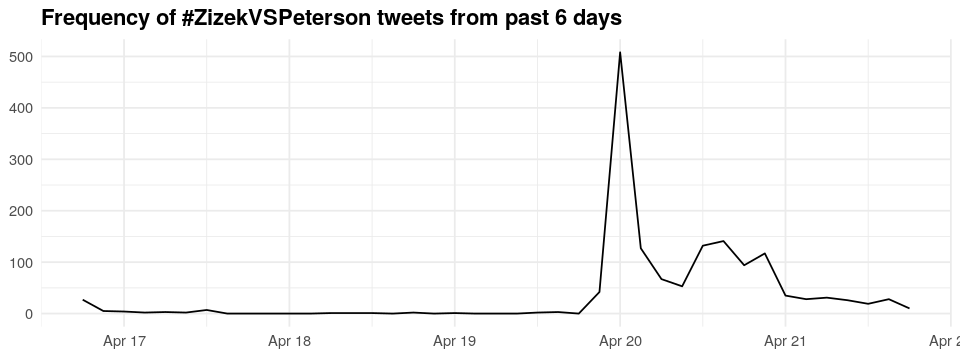

In [128]:
#Plot time series of tweets

# Setting the size of the plot
options(repr.plot.width=8, repr.plot.height=3)

ts_plot(zizek, "3 hours") + #aggregate by 3 hours
  theme_minimal() +
  theme(plot.title = element_text(face = "bold")) +
  labs(x = NULL, y = NULL,
    title = "Frequency of #ZizekVSPeterson tweets from past 6 days")

## 2. Analysis of users

In [9]:
## Get user IDs of accounts followed by Jordan Peterson
pet_fds <- get_friends("jordanbpeterson")

## Who are these users
pet_fds_data <- lookup_users(pet_fds$user_id)

In [ ]:
# Read this dataset:
# pet_fds_data <- read.csv('pet_fds_data.csv', header = TRUE)

In [82]:
head(pet_fds_data)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
108691306,1119974135768084481,2019-04-21 14:40:16,PriyamvadaGopal,2015 - Banned onshore wind projects 2015 - Scrapped warm homes standards 2016 - Shafted solar energy 2017 - Flogged… https://t.co/nGVOSOn5YN,Twitter Web Client,NA,NA,NA,NA,⋯,33995,32119,2010-01-26 19:18:48,FALSE,NA,NA,en,https://pbs.twimg.com/profile_banners/108691306/1540457269,http://abs.twimg.com/images/themes/theme13/bg.gif,http://pbs.twimg.com/profile_images/869824500296290304/gdrbsYs3_normal.jpg
1029600409554309120,1119991268401123329,2019-04-21 15:48:21,UnplannedMovie,#HappyEasterSunday https://t.co/IgzXdsCOfa,Twitter for iPhone,NA,NA,NA,NA,⋯,871,2758,2018-08-15 05:27:21,FALSE,https://t.co/bMXQrouB4n,http://Unplanned.com,en,https://pbs.twimg.com/profile_banners/1029600409554309120/1554093308,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1042279030781706240/9-5WzJmm_normal.jpg
1023722780968280069,1119861802446336000,2019-04-21 07:13:54,BarrettWilson6,@BridgetPhetasy It’s about fucking time!,Twitter for iPhone,NA,1119859374095081472,15567770,BridgetPhetasy,⋯,4728,7978,2018-07-30 00:11:45,FALSE,https://t.co/X3oQNwFS9B,https://paypal.me/BarrettPWilson,en,https://pbs.twimg.com/profile_banners/1023722780968280069/1532933722,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1023724029600051200/L8RHLncJ_normal.jpg
134976379,1119064034735575041,2019-04-19 02:23:51,MsMelChen,@arsatiki https://t.co/oTY3jt61H3,Twitter for iPhone,NA,1119062413217869824,38168260,arsatiki,⋯,6508,12078,2010-04-20 00:38:57,FALSE,https://t.co/sYA7l1FTSD,https://www.facebook.com/melcsquared,en,NA,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1080123319872036864/LKVyMmzG_normal.jpg
252786741,1120010663798218753,2019-04-21 17:05:25,IntizarZaidi,New Zealand cabinet split on what PM @JacindaArdern should wear to observe the #SriLankaAttacks on Churches on East… https://t.co/yXcXwvSPEm,Twitter for iPhone,NA,NA,NA,NA,⋯,6587,557,2011-02-15 22:29:19,FALSE,NA,NA,en,NA,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/378800000747937253/5c6fee691bce6a5381f977e9c16e4c46_normal.jpeg
450667347,1114515302354759680,2019-04-06 13:08:49,rudyardg,Rethinking Trade: Global Competitiveness Through Regional Cooperation https://t.co/06kCrU6WFH,IFTTT,NA,NA,NA,NA,⋯,2285,37,2011-12-30 14:24:04,FALSE,https://t.co/57KFv8eF7R,http://en.m.wikipedia.org/wiki/Rudyard_Griffiths,en,https://pbs.twimg.com/profile_banners/450667347/1519930770,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/762815009302851584/xeey0gZC_normal.jpg


In [92]:
# What other information we have about these users 
colnames(pet_fds_data)

[1] "user_id"                 "status_id"              
 [3] "created_at"              "screen_name"            
 [5] "text"                    "source"                 
 [7] "display_text_width"      "reply_to_status_id"     
 [9] "reply_to_user_id"        "reply_to_screen_name"   
[11] "is_quote"                "is_retweet"             
[13] "favorite_count"          "retweet_count"          
[15] "hashtags"                "symbols"                
[17] "urls_url"                "urls_t.co"              
[19] "urls_expanded_url"       "media_url"              
[21] "media_t.co"              "media_expanded_url"     
[23] "media_type"              "ext_media_url"          
[25] "ext_media_t.co"          "ext_media_expanded_url" 
[27] "ext_media_type"          "mentions_user_id"       
[29] "mentions_screen_name"    "lang"                   
[31] "quoted_status_id"        "quoted_text"            
[33] "quoted_created_at"       "quoted_source"          
[35] "quoted_favorite_count"   "quoted_retweet_count"   
[37] "quoted_user_id"          "quoted_screen_name"     
[39] "quoted_name"             "quoted_followers_count" 
[41] "quoted_friends_count"    "quoted_statuses_count"  
[43] "quoted_location"         "quoted_description"     
[45] "quoted_verified"         "retweet_status_id"      
[47] "retweet_text"            "retweet_created_at"     
[49] "retweet_source"          "retweet_favorite_count" 
[51] "retweet_retweet_count"   "retweet_user_id"        
[53] "retweet_screen_name"     "retweet_name"           
[55] "retweet_followers_count" "retweet_friends_count"  
[57] "retweet_statuses_count"  "retweet_location"       
[59] "retweet_description"     "retweet_verified"       
[61] "place_url"               "place_name"             
[63] "place_full_name"         "place_type"             
[65] "country"                 "country_code"           
[67] "geo_coords"              "coords_coords"          
[69] "bbox_coords"             "status_url"             
[71] "name"                    "location"               
[73] "description"             "url"                    
[75] "protected"               "followers_count"        
[77] "friends_count"           "listed_count"           
[79] "statuses_count"          "favourites_count"       
[81] "account_created_at"      "verified"               
[83] "profile_url"             "profile_expanded_url"   
[85] "account_lang"            "profile_banner_url"     
[87] "profile_background_url"  "profile_image_url"

In [93]:
# Where are they from?
table(pet_fds_data$country)


       Canada United States 
            3             1 

In [14]:
## Get user IDs of accounts following Jordan Peterson
pet_flw <- get_followers("jordanbpeterson", n = 10000)

## Who are these users
pet_flw_data <- lookup_users(pet_flw$user_id)

In [15]:
# Read this dataset
pet_flw_data <- read.csv('pet_flw_data.csv', header = TRUE)

In [84]:
head(pet_flw_data)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
394149285,1120012097570713600,2019-04-21 17:11:07,craigspalding05,"Nothing more embarrassing than getting the amazon fire stick back from your neighbour, plugging it in the living ro… https://t.co/djQUr0lDZf",Twitter for Android,NA,NA,NA,NA,⋯,2318,847,2011-10-19 16:59:16,FALSE,NA,NA,en,https://pbs.twimg.com/profile_banners/394149285/1411569873,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/912965261656915968/oIqBgJu6_normal.jpg
934169230886473728,1119708218966642688,2019-04-20 21:03:37,SamuelCappelli,US facial recognition will cover 97 percent of departing airline passengers within four years… https://t.co/nVohm3L8zF,Twitter for Android,NA,NA,NA,NA,⋯,773,4933,2017-11-24 21:17:55,FALSE,NA,NA,pt,https://pbs.twimg.com/profile_banners/934169230886473728/1553565721,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1110360819009757185/BlwNx_i5_normal.png
1119932213674557440,NA,NA,GiovaneVagner,NA,NA,NA,NA,NA,NA,⋯,0,0,2019-04-21 11:53:41,FALSE,NA,NA,pt,NA,NA,http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png
1118978126036590593,1120066646713012224,2019-04-21 20:47:53,RosaryCrystal,What utter nonsense. We do not have blasphemy laws in this country Jacob and I will criticise any religion as much… https://t.co/sC4vjiXTd8,Twitter Web Client,NA,NA,NA,NA,⋯,14,84,2019-04-18 20:42:29,FALSE,NA,NA,en,NA,NA,http://pbs.twimg.com/profile_images/1118978546708484096/X3UYSznW_normal.jpg
1111384420026466304,1117657026232868864,2019-04-15 05:12:54,RevDrMax,@leighelse @BishopTamaki So where is your line? What would you allow people to talk about? I err on the side of f… https://t.co/kkCiNTbe3C,Twitter for Android,NA,1117650646700707840,138649922,leighelse,⋯,5,1,2019-03-28 21:47:49,FALSE,NA,NA,en,NA,NA,http://pbs.twimg.com/profile_images/1111384689606955008/NlumytxW_normal.jpg
1118655103794327555,1119655278998323200,2019-04-20 17:33:15,Juanpa19823,@HecticTKS Gnocchis with tuco,Twitter for Android,NA,1119618592796966912,771169161925971969,HecticTKS,⋯,4,3,2019-04-17 23:18:55,FALSE,NA,NA,en,NA,NA,http://pbs.twimg.com/profile_images/1118655917233405953/pG_eGTuK_normal.jpg


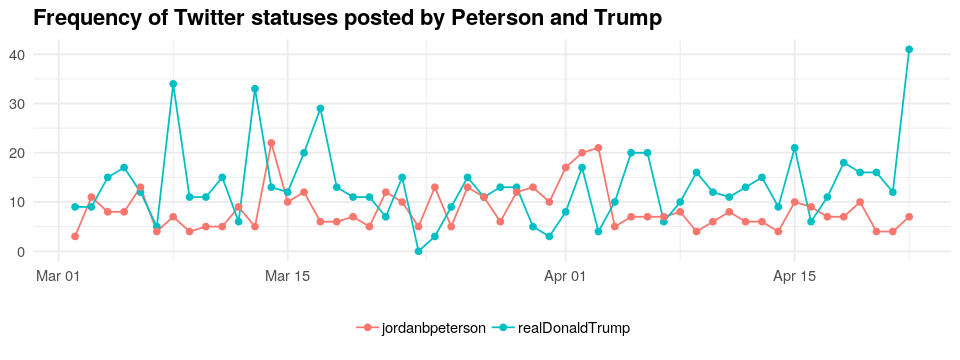

In [130]:
## Plot the frequency of tweets for each user over time

tmls <- get_timelines(c("jordanbpeterson", "realDonaldTrump"), n = 3000)

tmls %>%
  filter(created_at > "2019-03-01") %>%
  group_by(screen_name) %>%
  ts_plot("days", trim = 1L) +
  geom_point() +
  theme_minimal() +
  theme(legend.title = element_blank(),
    legend.position = "bottom",
    plot.title = element_text(face = "bold")) +
  labs(x = NULL, y = NULL,
    title = "Frequency of Twitter statuses posted by Peterson and Trump")

## 3. Sentiment analysis of tweets

We look at tweets containing #ZizekVSPeterson hashtags and at their sentiments.

Sentiment analysis is a process of computationally categorizing opinions.

Sentiments can be positive, negative, or neutral.

In [96]:
# We use 'zizek' dataset that contains tweets with #ZizekVSPeterson hashtag

# Remove URLs, hashtags and other twitter signs to clean the text of tweets
tweets.df2 <- gsub("http.*","", zizek$text)
tweets.df2 <- gsub("https.*","", tweets.df2)
tweets.df2 <- gsub("#.*","", tweets.df2) 
tweets.df2 <- gsub("@.*","", tweets.df2)

In [102]:
# We first get the emotion score for each tweet.
# There are 10 emotions in ‘syuzhet’ package:
# anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive.

word.df <- as.vector(tweets.df2)
emotion.df <- get_nrc_sentiment(word.df)
emotion.df2 <- cbind(tweets.df2, emotion.df) 
head(emotion.df2)

# Each tweet can be assigned to several emotions

tweets.df2,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
Debata,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0
〝The true utopia is that we can survive without a change.〞,0,0,0,1,0,0,0,0,0,1
Finally watching,0,1,1,0,1,0,1,1,0,1
Zizek viendo como Peterson se enreda solito en su muy liberal interpretación del imperativo categórico para justificar el capitalismo.,0,0,0,0,0,0,0,0,1,1
,0,0,0,0,0,0,0,0,0,0


In [104]:
# Getting the most positive sentiments
sent.value <- get_sentiment(word.df)
most.positive <- word.df[sent.value == max(sent.value)]
most.positive

[1] "Peterson agrees with Marx and Engels that capitalism produces great wealth. Why does he think he's pwning them? The issue is precisely that productivity and wealth can be used for EVERYONE'S benefit according to M&amp;E. "

In [106]:
# Getting negative sentiments
most.negative <- word.df[sent.value <= min(sent.value)] 
most.negative

[1] "Yo Peterson tag me in....this is bloody embarrassing. You don’t understand Marx or Capitalism it’s you rambling and saying ‘bloody’ ‘damn’ and ‘absurd’ every other word... "
[2] "Yo Peterson tag me in....this is bloody embarrassing. You don’t understand Marx or Capitalism it’s you rambling and saying ‘bloody’ ‘damn’ and ‘absurd’ every other word... "

In [107]:
# Separating positive, negative, and neutral tweets
positive.tweets <- word.df[sent.value > 0]
head(positive.tweets)

[1] "〝The true utopia is that we can survive without a change.〞"                                                                                                  
[2] "Finally watching "                                                                                                                                             
[3] "Interesting take. Best line: “are we screaming at each other because we disagree or because we do agree and we can’t imagine a solution?” "                    
[4] "\"Please, if you are a leftist, don't feel obliged to be politically correct. Think! Don't be afraid to think!\"\n\n-The Kantian Žižek... \"Sapere Aude!\"\n\n"
[5] "Só eu acho que o Zizek cago no debate? Ele tava super concordam com um liberal desonesto e se dizendo Hegeliano.. ?!!! Decepcionei "                           
[6] "Apparently the big takeaway from the "

In [108]:
negative.tweets <- word.df[sent.value < 0]
head(negative.tweets)

[1] "Peterson: \"I've written two books and produced hundreds of hours of online lectures. Go through all that before you presume to know what I mean.\"\n\nAlso Peterson: \"I've only read the Communist Manifesto but it's clear Marx wants everyone to die of starvation.\"\n"
[2] "The stupidest thing about the "                                                                                                                                                                                                                                             
[3] "Too much hype but no substance underneath it. "                                                                                                                                                                                                                             
[4] "Had no internet/network for two days so I (sorely...?) miss the "                                                                                                                                                                                                           
[5] "Peterson is proof the market does not punish stupidity. "                                                                                                                                                                                                                   
[6] "I'm late to "

In [114]:
negative.tweets

[1] "Peterson: \"I've written two books and produced hundreds of hours of online lectures. Go through all that before you presume to know what I mean.\"\n\nAlso Peterson: \"I've only read the Communist Manifesto but it's clear Marx wants everyone to die of starvation.\"\n"           
  [2] "The stupidest thing about the "                                                                                                                                                                                                                                                        
  [3] "Too much hype but no substance underneath it. "                                                                                                                                                                                                                                        
  [4] "Had no internet/network for two days so I (sorely...?) miss the "                                                                                                                                                                                                                      
  [5] "Peterson is proof the market does not punish stupidity. "                                                                                                                                                                                                                              
  [6] "I'm late to "                                                                                                                                                                                                                                                                          
  [7] "Imma just deepfry my brain early so I can just stay mushy all day "                                                                                                                                                                                                                    
  [8] "Had no internet/network for two days so I (sorely...?) miss the "                                                                                                                                                                                                                      
  [9] "Three days to go! Am in the best fighting shape of my life.\n"                                                                                                                                                                                                                         
 [10] "I think it’s insane not everyone on earth has seen "                                                                                                                                                                                                                                   
 [11] "Peterson: \"It's as if nature didn't exist in Marx!\"\n\n*ahem*\n\nMarx: \"It is absolutely impossible to transcend the laws of nature. What can change in historically different circumstances is only the form in which these laws expose themselves.”\n\n"                          
 [12] "Peterson: \"It's as if nature didn't exist in Marx!\"\n\n*ahem*\n\nMarx: \"It is absolutely impossible to transcend the laws of nature. What can change in historically different circumstances is only the form in which these laws expose themselves.”\n\n"                          
 [13] "“If you are a leftist - don’t feel obliged to be politically correct. Don’t be afraid to think!” - quote from "                                                                                                                                                                        
 [14] "Great article - even though I HATE to admit it. But as long as I am an anarchist - I shall ALWAYS be an anti-capitalist. "                                                                                                                                              

In [109]:
neutral.tweets <- word.df[sent.value == 0]
head(neutral.tweets)

[1] "Debata "                                                                                                                                    
[2] ""                                                                                                                                           
[3] "Zizek viendo como Peterson se enreda solito en su muy liberal interpretación del imperativo categórico para justificar el capitalismo. \n\n"
[4] ""                                                                                                                                           
[5] "Ya allah aşkına biri çevirsin şunu meraktan çatlayacağım "                                                                                  
[6] "In diesem Artikel über "

In [113]:
# Number of tweets in each category
length(positive.tweets)
length(negative.tweets)
length(neutral.tweets)

[1] 297

[1] 356

[1] 866

In [ ]:
# You can save these dataframes for further analysis:
# zizek <- apply(zizek,2,as.character)
# write.csv(zizek, "zizek.csv")

## 4. Exercises

* Get the data about another hashtag and compare its sentiments with the sentiments of #ZizekVSPeterson.

* Analyze the frequency of words and their relationships (see 'Youtube' notebook).

* Analyze sentiments of video descriptions at Trump's channel (see 'Youtube' notebook)